# Machine Learning Project - Rainfall prediction

# Data Exploration

## 1. Data Loading and Data Visualization

First we load some useful libraries for data loading and data visualization in Python

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time


In [2]:
# Data loading
path = ""
rain = pd.read_csv(path + "rain_project.txt", sep = " ", )
# Let's take a look at the data
rain.head()

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
1,22092001_527,2017-06-11,3.945000,289.408750,285.277083,78.783333,246.750000,0.0,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,2.328277,101672.850,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.375833,273.422500,81.700000,260.333333,1.2,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,10.675441,100583.760,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.869167,286.723333,87.620833,259.041667,0.2,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,4.582309,101482.984,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.288750,280.215833,76.587500,216.541667,0.0,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,0.940254,102223.586,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.527917,274.529167,81.391667,285.541667,1.6,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,13.903076,102416.220,0.0,no_rain


In [3]:
#Add a new column called "Month"
from datetime import datetime, timedelta

rain["date"] = pd.to_datetime(rain["date"])
rain['month'] = pd.to_datetime(rain['date']).dt.month
rain.head

<bound method NDFrame.head of                Id       date        ff           t          td         hu  \
1    22092001_527 2017-06-11  3.945000  289.408750  285.277083  78.783333   
2     22092001_65 2016-03-06  3.739583  276.375833  273.422500  81.700000   
3    22092001_210 2016-07-29  3.273750  288.869167  286.723333  87.620833   
4    22092001_136 2016-05-16  1.745000  284.288750  280.215833  76.587500   
5     22092001_33 2016-02-03  5.718750  277.527917  274.529167  81.391667   
..            ...        ...       ...         ...         ...        ...   
726  22092001_468 2017-04-13  2.882083  282.222500  279.475000  83.758333   
727  22092001_601 2017-08-24  2.220417  288.644583  284.997917  81.075000   
728  22092001_507 2017-05-22  4.194583  289.697500  283.868750  69.637500   
729  22092001_160 2016-06-09  1.874167  290.932083  287.276667  81.483333   
730  22092001_459 2017-04-04  4.409167  282.090000  280.958333  92.866667   

             dd  precip  ws_arome  p3031_arom

We will store the name of variables in `var_names` variables and quantitative variables, qualitatives variables as `num_var` and `qual_var` respectively

In [4]:
names = list(rain.columns)
num_var = names[2:-2]
qual_var = [names[i] for i in [0,1,-1]]

### Unidimensional descriptive

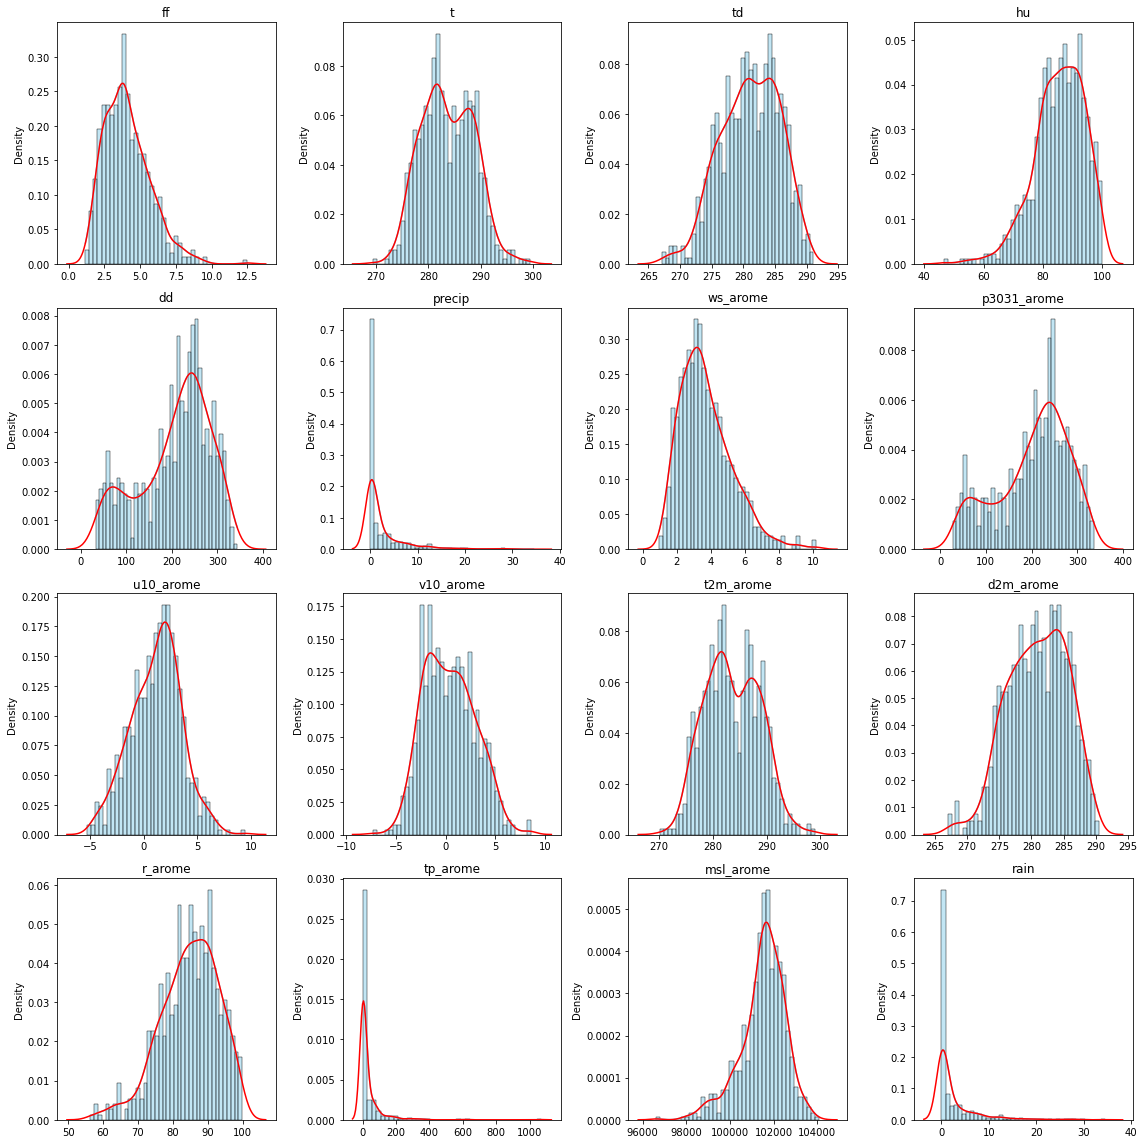

In [5]:
hist_fig, axs = plt.subplots(4,4,figsize=(16,16))
axs = axs.ravel()
for i in range(16):
    # sns.histplot(rain[num_var[i]], ax = axs[i])
    sns.histplot(data=rain[num_var[i]], stat='density', bins=40, kde=True, color="skyblue", ax=axs[i])
    sns.kdeplot(rain[num_var[i]], color='red', ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_var[i])
plt.tight_layout()
# sns.histplot(rain['ff'])

In [6]:
from math import log
rain["precip_log"] = rain["precip"].map(lambda x: log(1+log(1+x)))
rain["tp_arome_log"] = rain["tp_arome"].map(lambda x: log(1+x))
del rain["precip"]
del rain["tp_arome"]

In [7]:
rain_hist = pd.DataFrame.copy(rain)
del rain_hist["rain_class"]
del rain_hist["month"]
rain_hist.columns

Index(['Id', 'date', 'ff', 't', 'td', 'hu', 'dd', 'ws_arome', 'p3031_arome',
       'u10_arome', 'v10_arome', 't2m_arome', 'd2m_arome', 'r_arome',
       'msl_arome', 'rain', 'precip_log', 'tp_arome_log'],
      dtype='object')

In [8]:
col = rain_hist.columns[2:]

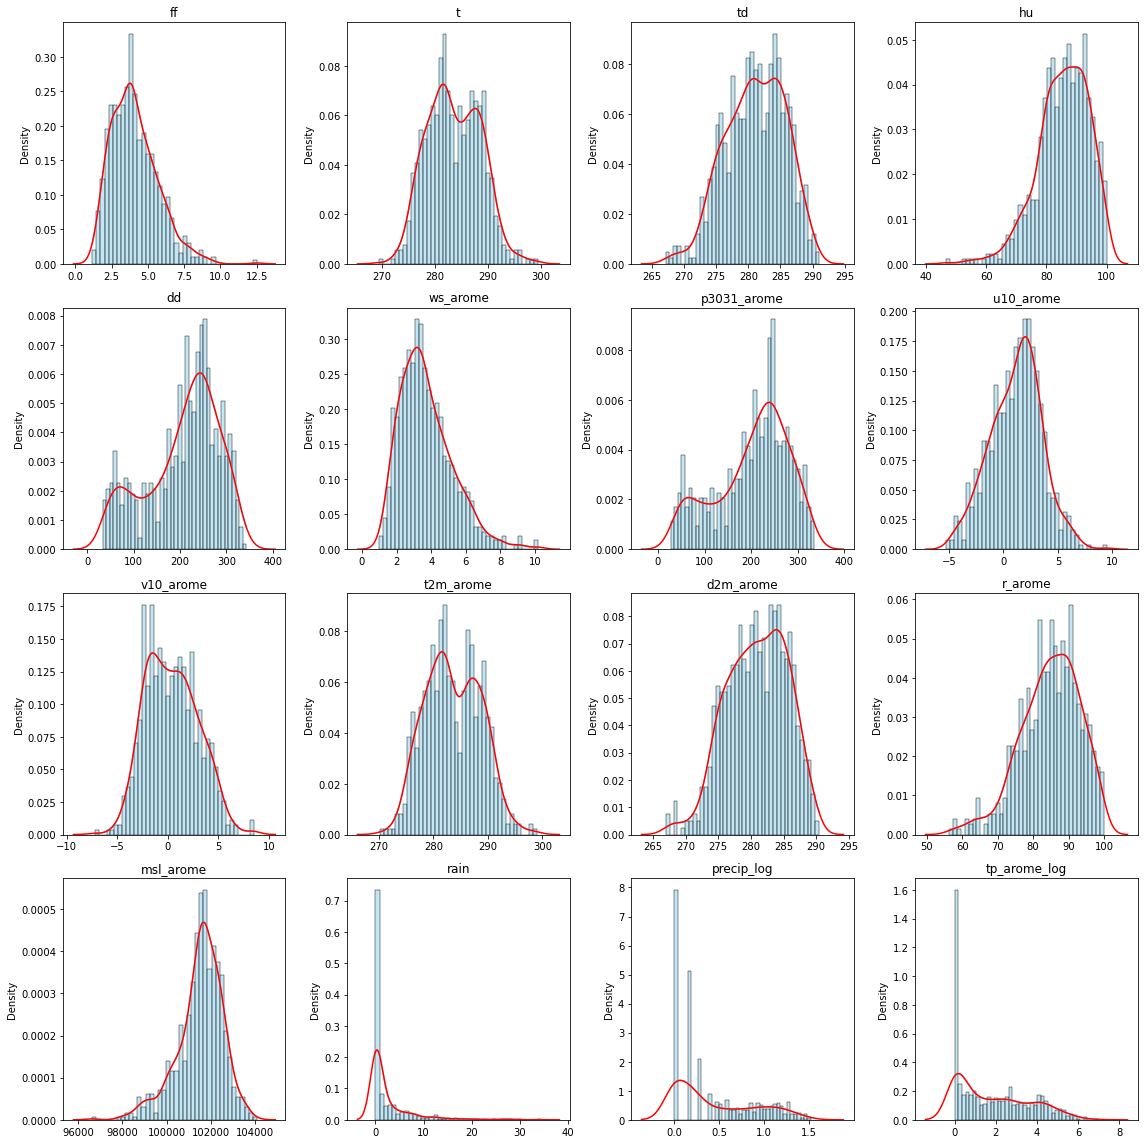

In [9]:
hist_fig, axs = plt.subplots(4,4,figsize=(16,16))
axs = axs.ravel()
for i in range(len(col)):
    sns.histplot(data=rain[col[i]], stat='density', bins=40, kde=True, color="skyblue", ax=axs[i])
    sns.kdeplot(rain[col[i]], color='red', ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col[i])
plt.tight_layout()

In [10]:
# We normalize tha data to obtain the scaled data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
rain_scaled = rain
rain_scaled[col] = ss.fit_transform(rain_scaled[col])

### Mutidimensional exploration

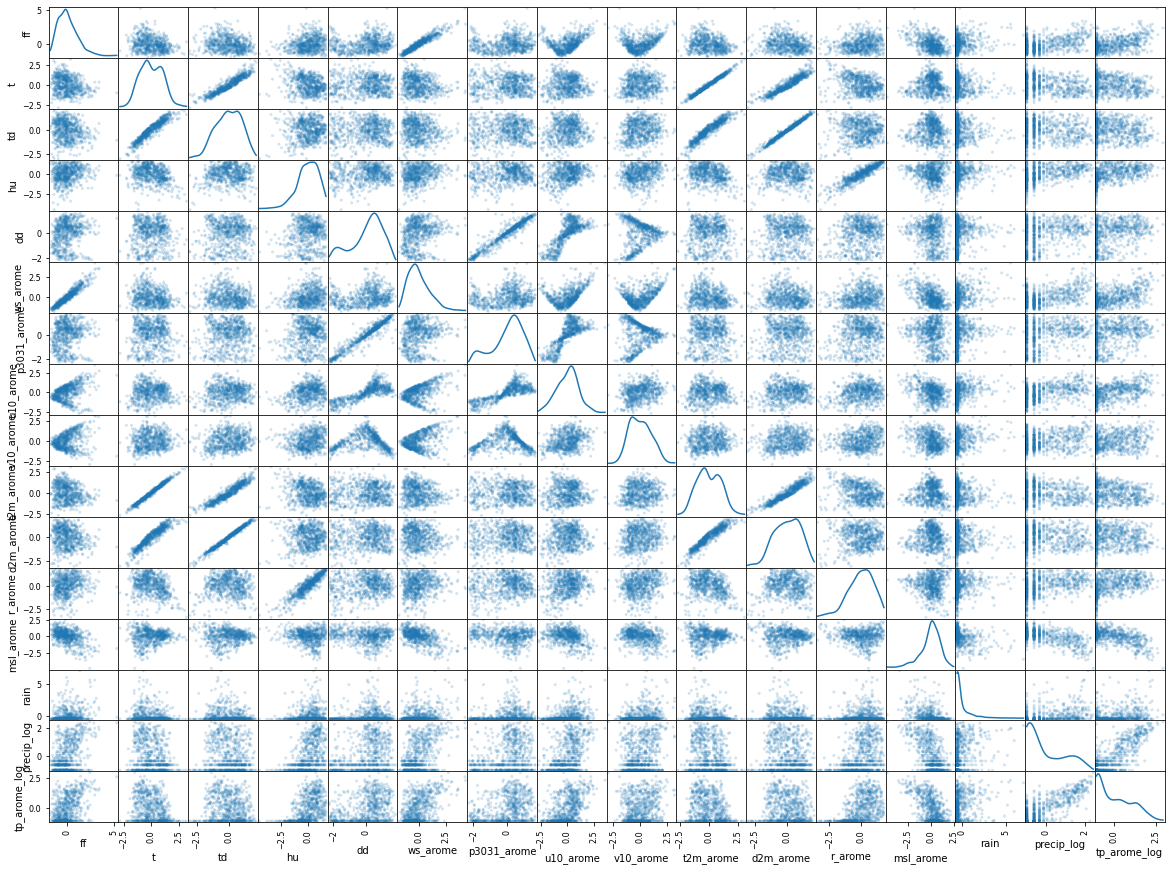

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(rain_scaled[col], alpha = 0.2, figsize= (20,15), diagonal= 'kde')
plt.show()

In [12]:
corr_matrix = rain_scaled[col].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,ff,t,td,hu,dd,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,msl_arome,rain,precip_log,tp_arome_log
ff,1.000000,-0.245199,-0.183893,0.181479,0.178834,0.956595,0.140884,0.367537,0.251008,-0.211024,-0.166712,0.142911,-0.475120,0.255797,0.452655,0.466924
t,-0.245199,1.000000,0.937510,-0.273090,-0.002631,-0.199787,-0.005524,0.016803,0.094297,0.991619,0.934243,-0.304685,0.049184,-0.168405,-0.212752,-0.250027
td,-0.183893,0.937510,1.000000,0.076159,0.058783,-0.127256,0.052609,0.118862,0.158838,0.943204,0.991957,0.008253,0.001688,-0.118264,-0.063255,-0.088843
hu,0.181479,-0.273090,0.076159,1.000000,0.146699,0.204133,0.137748,0.260105,0.182192,-0.236887,0.061556,0.905829,-0.129265,0.156748,0.436846,0.467622
dd,0.178834,-0.002631,0.058783,0.146699,1.000000,0.208099,0.956346,0.776472,0.025607,0.008809,0.070518,0.158024,-0.141638,0.119808,0.261587,0.325183
ws_arome,0.956595,-0.199787,-0.127256,0.204133,0.208099,1.000000,0.168327,0.444981,0.359332,-0.158508,-0.110433,0.141098,-0.542644,0.301419,0.498149,0.498730
p3031_arome,0.140884,-0.005524,0.052609,0.137748,0.956346,0.168327,1.000000,0.784229,0.041566,0.001867,0.061397,0.151970,-0.135211,0.131621,0.256984,0.318140
u10_arome,0.367537,0.016803,0.118862,0.260105,0.776472,0.444981,0.784229,1.000000,0.279258,0.036458,0.120392,0.215941,-0.311144,0.277475,0.425063,0.465612
v10_arome,0.251008,0.094297,0.158838,0.182192,0.025607,0.359332,0.041566,0.279258,1.000000,0.078581,0.144472,0.183839,-0.272035,0.268235,0.228747,0.167605
t2m_arome,-0.211024,0.991619,0.943204,-0.236887,0.008809,-0.158508,0.001867,0.036458,0.078581,1.000000,0.944672,-0.302782,0.011116,-0.152640,-0.181533,-0.220852


> Commentaire: il y a une forte corrélation entre...

No handles with labels found to put in legend.


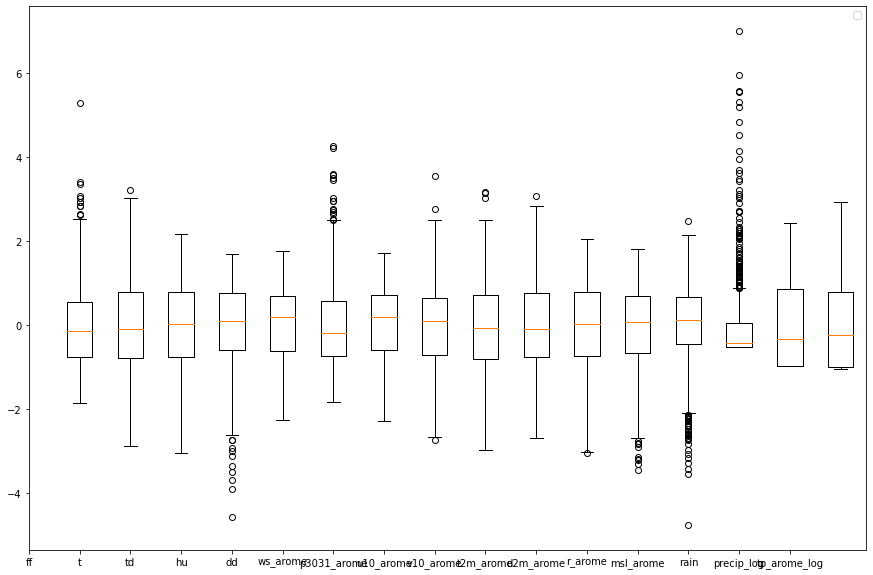

In [13]:
plt.figure(figsize = (15,10))
plt.boxplot(rain_scaled[col])
plt.xticks(np.arange(16),col)
plt.legend()

plt.show()

## 2. Principal component analysis

In [14]:
rain_acp = pd.DataFrame.copy(rain)
del rain_acp["rain"]
del rain_acp["rain_class"]
del rain_acp["date"]
del rain_acp["month"]
del rain_acp["Id"]
var_acp = rain_acp.columns

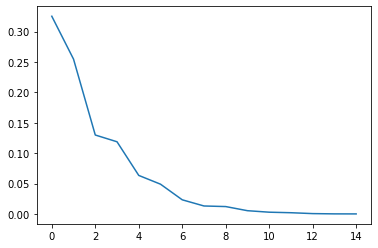

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(rain_scaled[var_acp]).transform(rain_scaled[var_acp])
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

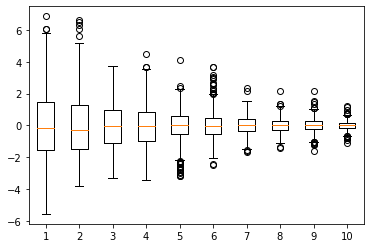

In [16]:
## distribution des composantes principales
plt.boxplot(C[:,0:10])
plt.show()

We decide to keep the first 4 components of PCA

In [17]:
rain_scaled.head()

,Id,date,ff,t,td,hu,dd,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,msl_arome,rain,rain_class,month,precip_log,tp_arome_log
1,22092001_527,2017-06-11,-0.086276,1.165624,0.911198,-0.798815,0.520432,-0.036622,0.530171,0.802536,0.401050,1.119517,0.921523,-0.699507,0.153412,-0.473859,low_rain,6,-0.969076,-0.362398
2,22092001_65,2016-03-06,-0.215452,-1.472600,-1.662542,-0.455049,0.696394,-0.257852,1.324106,0.557303,-0.889355,-1.553856,-1.583566,0.181588,-0.906150,0.398947,high_rain,3,0.331769,0.353770
3,22092001_210,2016-07-29,-0.508392,1.056397,1.225192,0.242796,0.679661,-0.321254,0.682109,0.770685,0.233398,1.198205,1.207852,-0.305306,-0.031306,-0.517499,no_rain,7,-0.594321,-0.067294
4,22092001_136,2016-05-16,-1.469748,0.129194,-0.187647,-1.057622,0.129106,-1.318482,-0.828422,-0.605484,-0.694211,0.222093,-0.125007,-1.140871,0.689217,-0.517499,no_rain,5,-0.969076,-0.670334
5,22092001_33,2016-02-03,1.029149,-1.239386,-1.422274,-0.491390,1.022949,0.464961,1.064271,1.187298,-0.717566,-1.166897,-1.383551,-0.530713,0.876628,-0.517499,no_rain,2,0.531584,0.493051


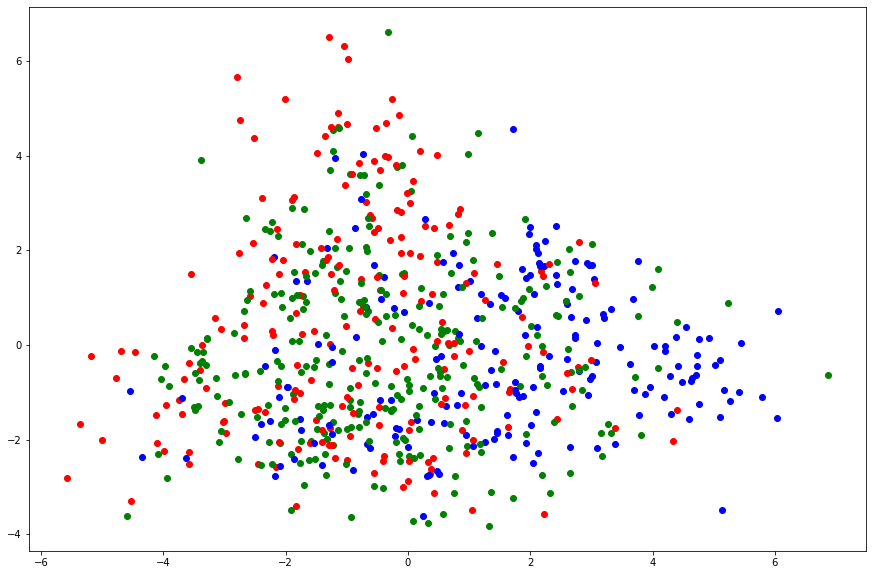

In [18]:
## Repésentation des individus
plt.figure(figsize=(15,10))
for i, j, q in zip(C[:,0], C[:,1], rain["rain_class"]):
    if q == "no_rain":
        color = "red"  
    elif q == "low_rain":
        color = "green"
    else: color = "blue"
    plt.plot(i, j, "o",color=color)
#plt.axis((-6,8,-5,7))  
plt.show()

With PCA, we realise that the data will be difficult to classify with a linear method(PCA is linear). We can hope that with an SVM or a RAndom Forest classes will be more distingueshed

In [19]:
pca.components_

array([[ 0.31103333, -0.26577693, -0.18616019,  0.24289979,  0.21274478,
         0.3212333 ,  0.20768672,  0.27444264,  0.12292168, -0.2517743 ,
        -0.181247  ,  0.23407263, -0.25190052,  0.33858974,  0.35752464],
       [-0.05381492, -0.40591897, -0.44891039, -0.07279125, -0.21748604,
        -0.09665032, -0.21340611, -0.26670734, -0.16014075, -0.41517227,
        -0.45104575, -0.04001108,  0.14257119, -0.12168654, -0.11835459],
       [ 0.23717632,  0.06916588,  0.10467099,  0.104572  , -0.52729566,
         0.24894998, -0.54008195, -0.30905387,  0.24305387,  0.08076474,
         0.10410277,  0.06479473, -0.26432729,  0.16378474,  0.11191205],
       [ 0.30824024,  0.06984252, -0.13088548, -0.57554936,  0.062797  ,
         0.31165101,  0.05484936,  0.09024837,  0.02700898,  0.07411771,
        -0.12323373, -0.59783661, -0.23299042, -0.03320331, -0.07275839],
       [-0.23362278,  0.0385557 ,  0.00572509, -0.09677036, -0.02586466,
        -0.25569339, -0.02353903, -0.14924732, 

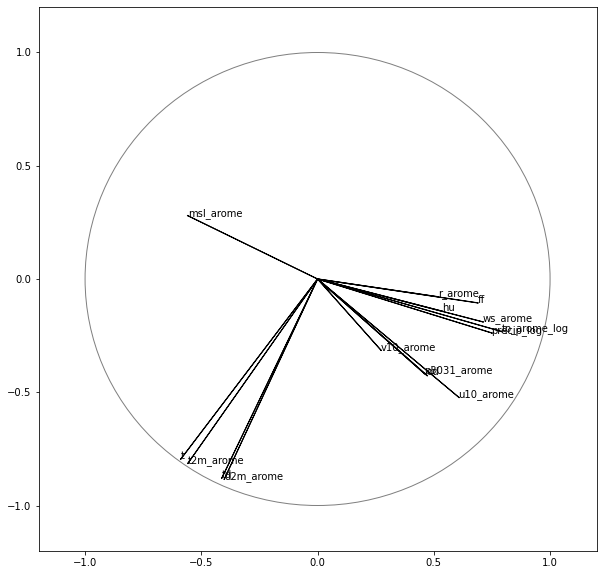

In [20]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2,var_acp):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
#plt.grid(True)
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Les variables les plus corélées avec la \bold{première} composante sont : 
    r_arome, hu, ff, ws_arome, tp_arome_log, precip_log (positif)
    msl_arome(négatif)
   
Les variables corélées  moyennement avec la \bold{première} composante sont : 
   v10_arome, p303_arome, u10_arome
   
Les variables les plus corélées avec la \bold{deuxième} composante sont : 
    t2m_arome, d2m_arome, t, dd

## Modelisations


In [21]:
n = len(rain)
print(n)

688


In [22]:
from sklearn.model_selection import train_test_split  
X_train,X_test,RainR_train,RainB_test=train_test_split(rain_scaled,rain['rain_class'],test_size=200,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(rain_scaled,rain['rain'],test_size=200,random_state=11)

### Modèle Linéaire

A titre de comparaison, on trace la prévision du rain de l'échantillon train par la seule valeur du modèle *Precip* ainsi que les résidus à ce modèle fonction de la valeur prédite (Precip)

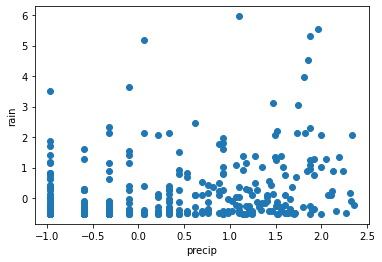

In [23]:
plt.plot(X_train["precip_log"],Yr_train,"o")
plt.xlabel("precip")
plt.ylabel("rain")
plt.show()

In [24]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_train,X_train["precip_log"]))

R2= -0.37898724953501617


In [26]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a :math:`R^2` score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average', 'variance_weighted'},             array-like of shape (n_o

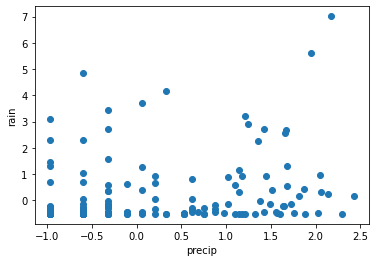

In [25]:
plt.plot(X_test["precip_log"],Yr_test,"o")
plt.xlabel("precip")
plt.ylabel("rain")
plt.show()

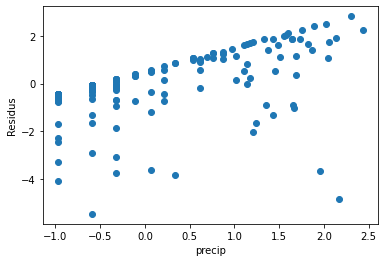

In [27]:
plt.plot(X_test["precip_log"],X_test["precip_log"]-Yr_test,"o")
plt.xlabel("precip")
plt.ylabel("Residus")
plt.show()